In [1]:
#importing libraries
import numpy as np
import sklearn
import pandas as pd
import itertools
import string
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('C:\\01_Data\\PythonProgram\\drugsComTrain.csv',sep=',')
print(df.head())

   Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           1

print(df.condition.value_counts())

In [3]:
df_train= df[(df['condition']=='Birth Control')|(df['condition']=='Depression')|(df['condition'] == 'High Blood Pressure') |(df['condition'] == 'Diabetes, Type 2') ]
print(df_train.shape)
X=df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'], axis=1)

(42732, 7)


In [4]:
#EDA
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

Text(0.5, 1.0, 'Word cloud for Birth control')

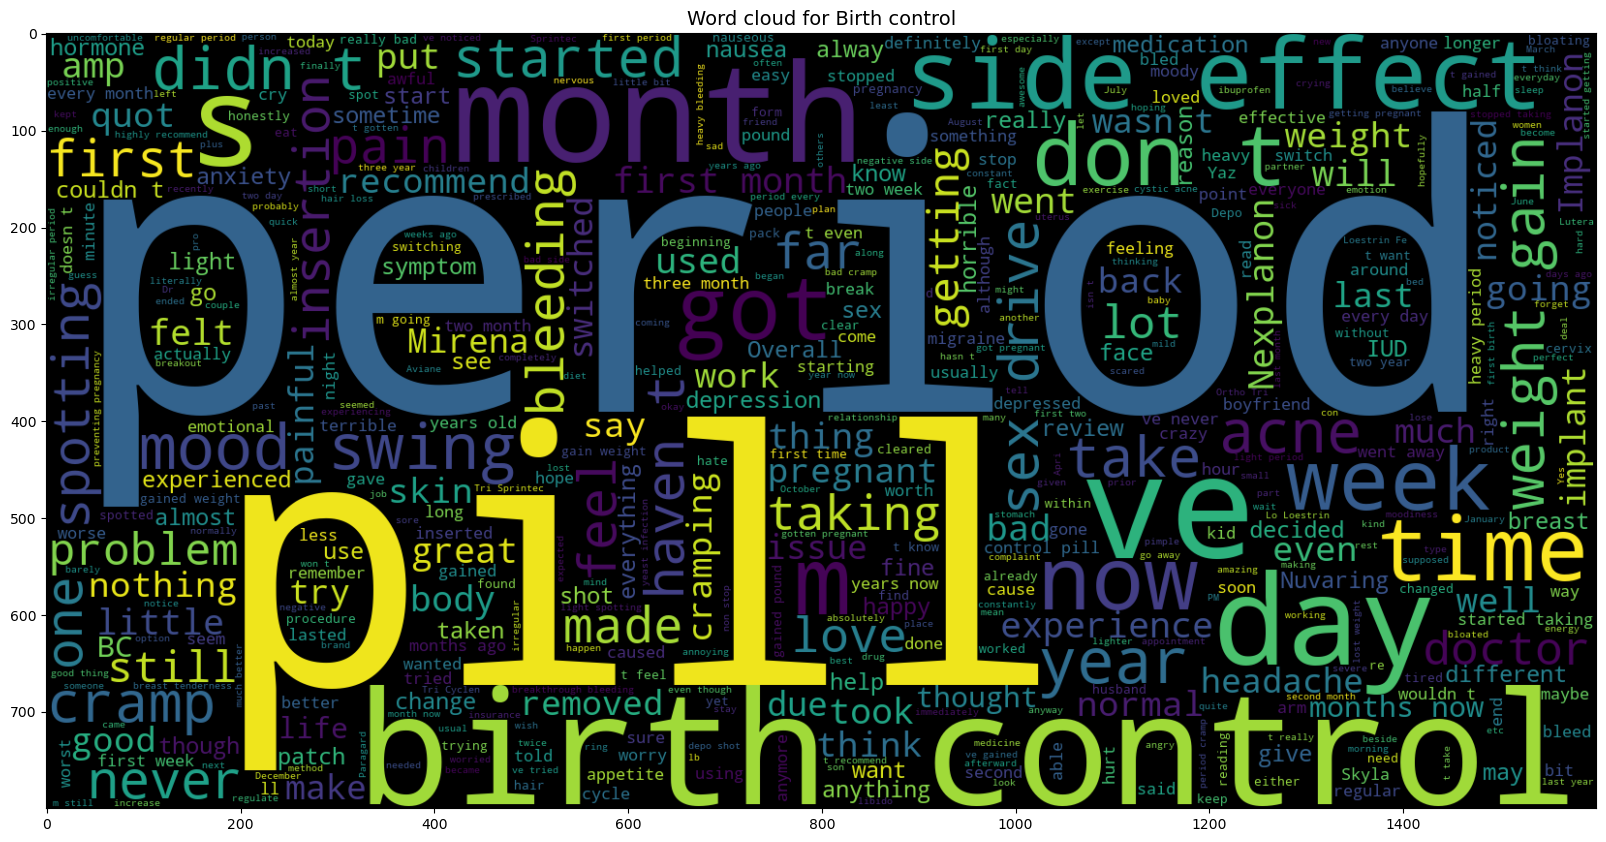

In [5]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=1600,height=800).generate(" ".join(X_birth.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

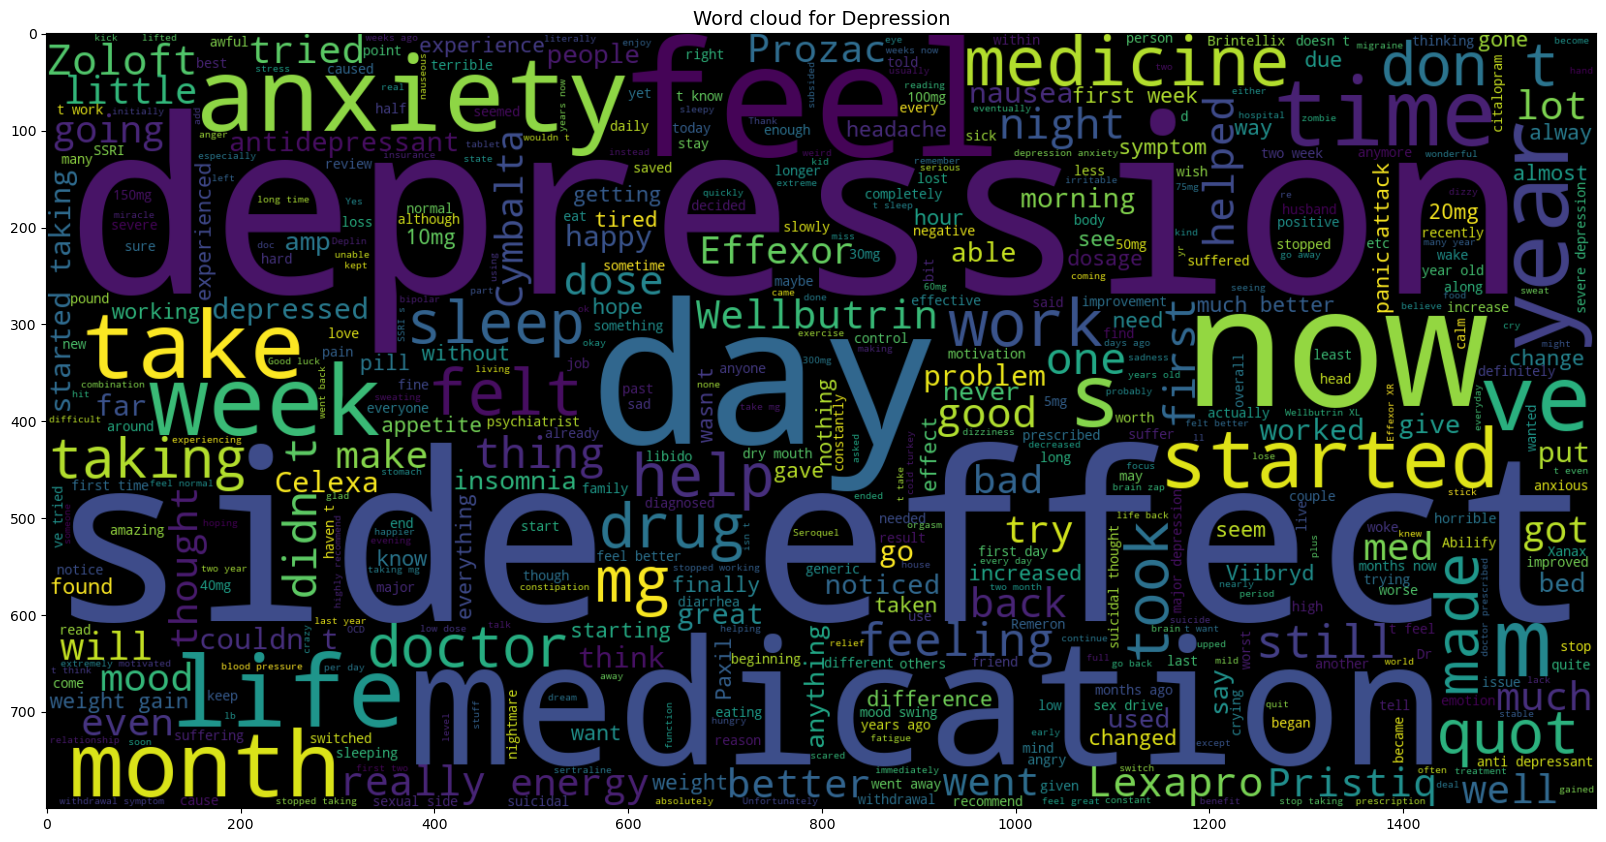

In [6]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=1600,height=800).generate(" ".join(X_dep.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

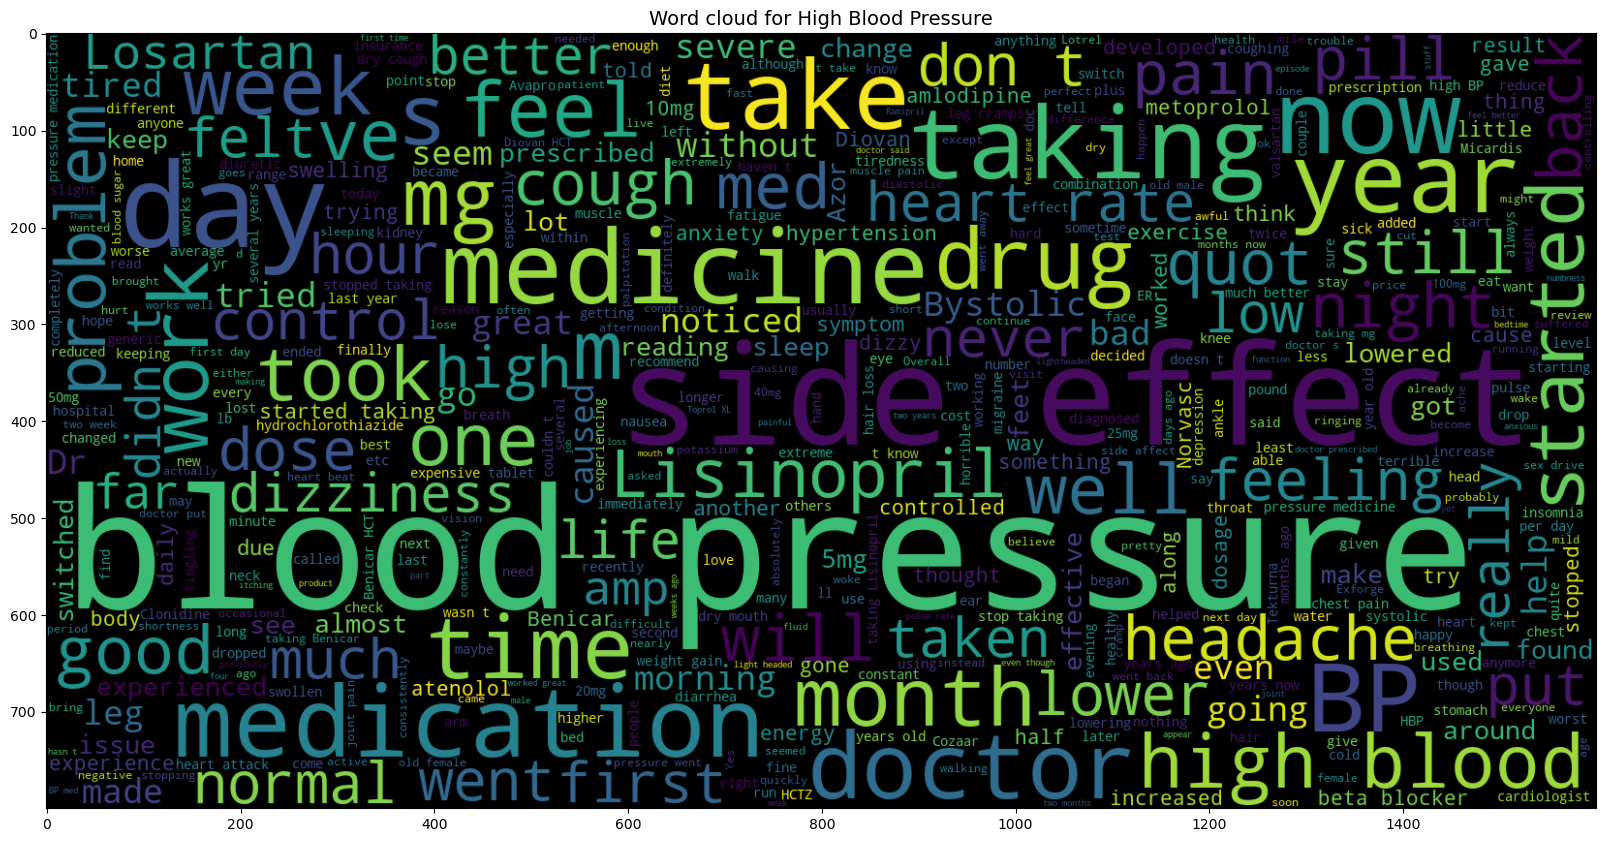

In [7]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=1600,height=800).generate(" ".join(X_bp.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

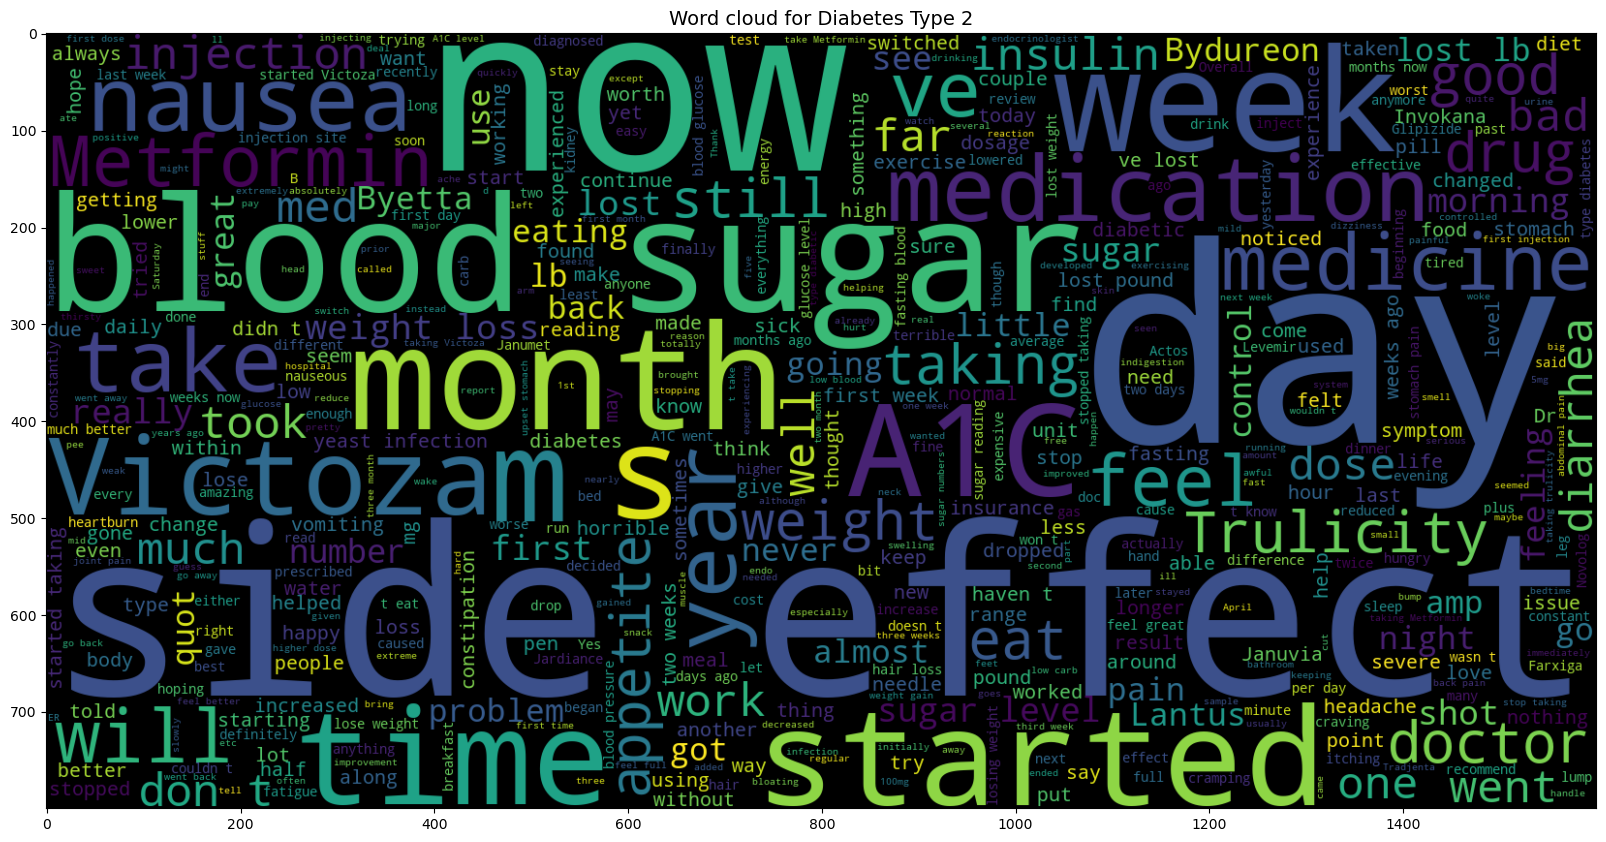

In [8]:

plt.figure(figsize=(20,20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_diab.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Diabetes Type 2', fontsize=14)


In [9]:
#Data processing
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')
print(X.head())

        condition                                             review
2   Birth Control  I used to take another oral contraceptive, whi...
3   Birth Control  This is my first time using any form of birth ...
9   Birth Control  I had been on the pill for many years. When my...
11     Depression  I have taken anti-depressants for years, with ...
14  Birth Control  Started Nexplanon 2 months ago because I have ...


In [10]:
from nltk.corpus import stopwords
stop=stopwords.words("english")
print(stop)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [11]:
 #Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [12]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [13]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [14]:
from bs4 import BeautifulSoup
import re

In [15]:
def review_to_words(raw_review):
    review_text = raw_review
    letters_only = re.sub('[^a-zA-Z]',' ', review_text) 
    words = letters_only.lower().split() 
    meaningful_words = [w for w in words if not w in stop]
    lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    return (' '.join(lemmatize_words))

In [16]:
X["review_clean"]= X['review'].apply(review_to_words)
pd.set_option('display.max_colwidth', None)
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2                                  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   
9                                                      I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.   
11                                                                                                                                                                                                                                                                                                                                  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months no

In [17]:
X_feat=X['review_clean']
y=X['condition']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

In [19]:
def plot_confusion_matrix (cm, classes, normalize=False,title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm=cm.astype('float')/ cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")

    thresh = cm.max()/2,
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment = 'center',color='white' if cm[i,j]> thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
X_train_text = X_train["review_clean"]
X_test_text = X_test["review_clean"]

vectorizer = CountVectorizer()
count_train = vectorizer.fit_transform(X_train_text)
count_test = vectorizer.transform(X_test_text)

print(count_train.shape[0], len(y_train)) 
print(count_test.shape[0], len(y_test)) 


34185 34185
8547 8547


accuracy : 0.971
Confusion Matrix, without Normalization


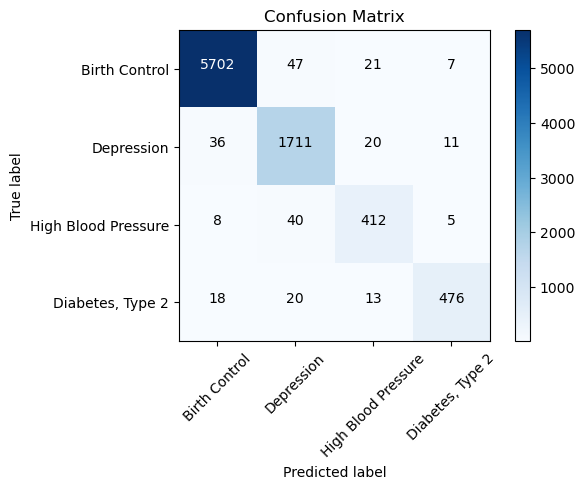

In [21]:
#ML model : Naive Bayes
mnb = MultinomialNB()
mnb.fit(count_train,y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy : %0.3f" %score)

cm= metrics.confusion_matrix(y_test,pred,labels=["Birth Control","Depression","High Blood Pressure","Diabetes, Type 2"])
plot_confusion_matrix(cm,classes=["Birth Control","Depression","High Blood Pressure","Diabetes, Type 2"])

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X['review_clean'])
y = X['condition']

CV Accuracy: 0.9774173482341044
Confusion Matrix, without Normalization


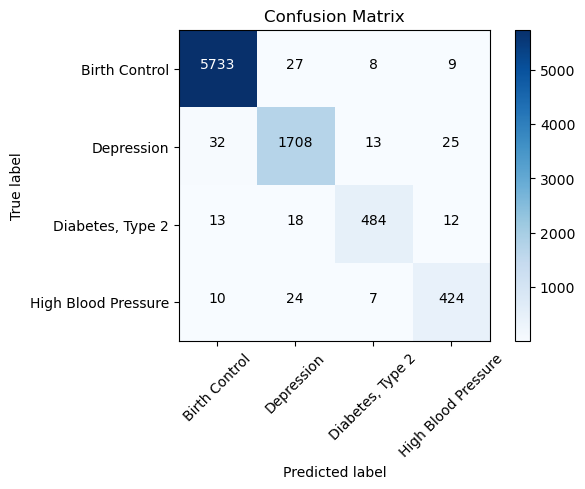

In [44]:
passive = PassiveAggressiveClassifier(class_weight='balanced')
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = accuracy_score(y_test, pred)
scores = cross_val_score(passive, X_vectorized, y, cv=5)
print("CV Accuracy:", scores.mean())

cm = confusion_matrix(y_test, pred)
non_zero_idx = np.where(~(cm.sum(axis=0) == 0) & ~(cm.sum(axis=1) == 0))[0]
cm_filtered = cm[non_zero_idx][:, non_zero_idx]

unique_labels = np.unique(np.concatenate((y_test, pred)))
labels_filtered = [unique_labels[i] for i in non_zero_idx]

plot_confusion_matrix(cm_filtered, classes=labels_filtered)

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(count_train, y_train)
pred_lr = log_reg.predict(count_test)

print(metrics.classification_report(y_test, pred_lr))


                     precision    recall  f1-score   support

      Birth Control       1.00      0.99      0.99      5777
         Depression       0.96      0.96      0.96      1778
   Diabetes, Type 2       0.94      0.94      0.94       527
High Blood Pressure       0.85      0.94      0.89       465

           accuracy                           0.98      8547
          macro avg       0.94      0.96      0.95      8547
       weighted avg       0.98      0.98      0.98      8547



In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_train_2=tfidf_vectorizer.fit_transform(X_train['review'])
tfidf_test_2= tfidf_vectorizer.transform(X_test['review'])

In [46]:
# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train['review'])
tfidf_test = tfidf_vectorizer.transform(X_test['review'])
pass_tf = PassiveAggressiveClassifier(class_weight='balanced')
pass_tf.fit(tfidf_train, y_train)

pred = pass_tf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("Accuracy: %0.3f " % score)

cm = confusion_matrix(y_test, pred)
non_zero_idx = np.where(~(cm.sum(axis=0) == 0) & ~(cm.sum(axis=1) == 0))[0]
cm_filtered = cm[non_zero_idx][:, non_zero_idx]
unique_labels = np.unique(np.concatenate((y_test, pred)))
labels_filtered = [unique_labels[i] for i in non_zero_idx]
plot_confusion_matrix(cm_filtered, classes=labels_filtered)

Accuracy: 0.982 
Confusion Matrix, without Normalization


In [27]:
#TFIDF: Bigrams
tfidf_vectorizer2= TfidfVectorizer(stop_words='english',max_df=0.8,ngram_range=(1,2))
tfidf_train_2=tfidf_vectorizer2.fit_transform(X_train['review'])
tfidf_test_2=tfidf_vectorizer2.transform(X_test['review'])

Accuracy: 0.985
Confusion Matrix, without Normalization


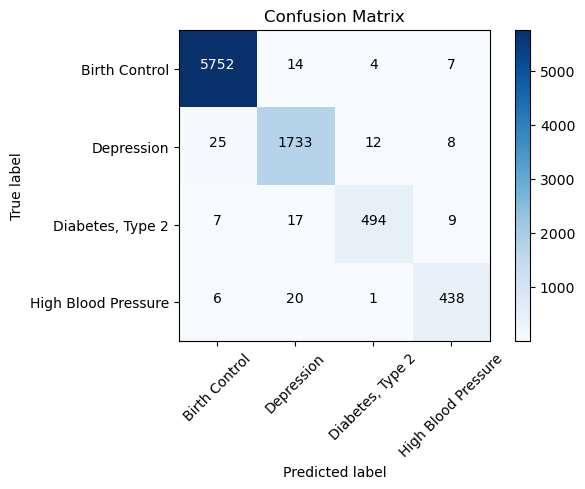

In [47]:
pass_tf = PassiveAggressiveClassifier(class_weight='balanced')
pass_tf.fit(tfidf_train_2, y_train)

pred = pass_tf.predict(tfidf_test_2)
score = accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

cm = confusion_matrix(y_test, pred)
non_zero_idx = np.where(~(cm.sum(axis=0) == 0) & ~(cm.sum(axis=1) == 0))[0]
cm_filtered = cm[non_zero_idx][:, non_zero_idx]
unique_labels = np.unique(np.concatenate((y_test, pred)))
labels_filtered = [unique_labels[i] for i in non_zero_idx]

plot_confusion_matrix(cm_filtered, classes=labels_filtered)


Accuracy : 0.985 
Confusion Matrix, without Normalization


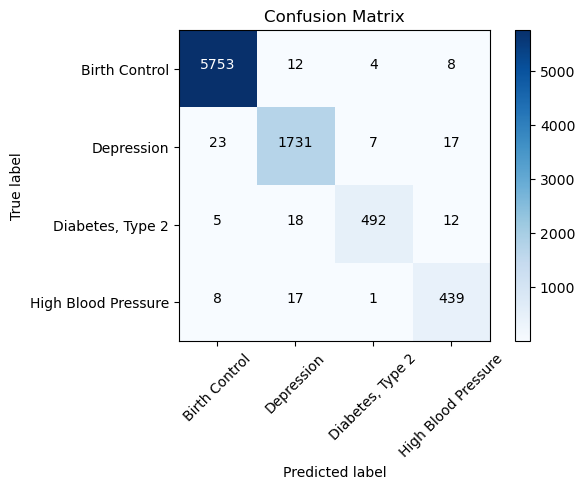

In [48]:
# TFIDF: Trigrams
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train['review'])
tfidf_test_3 = tfidf_vectorizer3.transform(X_test['review'])

pass_tf = PassiveAggressiveClassifier(class_weight='balanced')
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = accuracy_score(y_test, pred)
print("Accuracy : %0.3f " % score)

cm = confusion_matrix(y_test, pred)
non_zero_idx = np.where(~(cm.sum(axis=0) == 0) & ~(cm.sum(axis=1) == 0))[0]
cm_filtered = cm[non_zero_idx][:, non_zero_idx]

unique_labels = np.unique(np.concatenate((y_test, pred)))
labels_filtered = [unique_labels[i] for i in non_zero_idx]

plot_confusion_matrix(cm_filtered, classes=labels_filtered)

In [30]:
  def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]
    for coef, feat in topn:
        print(classlabel, feat, coef)
        
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')

Birth Control solids 0.46443569794445827
Birth Control spiro 0.4671741336966867
Birth Control massage 0.47731502061744935
Birth Control marjiuana 0.5046692550782489
Birth Control zzzquil 0.5111381631340277
Birth Control reservations 0.5535425516970703
Birth Control heartrate 0.5634883666566759
Birth Control neosporin 0.612259190130583
Birth Control conquered 0.6804188132117304
Birth Control bumped 0.6926004234690409


In [31]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')

Depression nearsighted 0.5476501622088654
Depression wonderful 0.5534218254178256
Depression organized 0.5559207749782985
Depression everynight 0.5615832756995356
Depression playfulness 0.5808651503432237
Depression poker 0.6068861460794966
Depression packed 0.6219031837232742
Depression wihtout 0.6951566922770583
Depression nbsp 0.8916197404794569
Depression 150lbs 1.689897898813286


In [32]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')

High Blood Pressure hating 0.39058460288368857
High Blood Pressure myrtle 0.41719366429870053
High Blood Pressure onglyza 0.44135317712756295
High Blood Pressure ongoing 0.44135317712756295
High Blood Pressure debt 0.44154342734258184
High Blood Pressure obnoxiously 0.45229962943586655
High Blood Pressure indentical 0.5088515813399529
High Blood Pressure hab 0.5915943410035227
High Blood Pressure observable 0.5973169427236115
High Blood Pressure munchy 2.3086097969059924


In [33]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 gy 0.4381700028804709
Diabetes, Type 2 simvastatin 0.49164043892246007
Diabetes, Type 2 micronor 0.504832951930948
Diabetes, Type 2 mind 0.506841951069439
Diabetes, Type 2 victoria 0.532514887266506
Diabetes, Type 2 trashcan 0.5474077294331811
Diabetes, Type 2 t2 0.6179900459110109
Diabetes, Type 2 synthroid 0.7685401338950673
Diabetes, Type 2 ice 0.9584033038127092
Diabetes, Type 2 icecream 0.9584033038127092


#Sample Predictions


In [34]:
X.tail()

condition  \
161273        Birth Control   
161278     Diabetes, Type 2   
161286           Depression   
161290  High Blood Pressure   
161291        Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
161273  I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile.   
161278                                                                                                                                                                                                                                                                                                                                                                                                   I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me   
161286                                                                                                                                                                                                                                                                                                                                                                                         This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.   
161290                                                                                                                                                                                  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.   
161291                                                                                                                                                                                                                          This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(   

                                                                                                                          

In [35]:
text = ["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test= tfidf_vectorizer3.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

np.str_('High Blood Pressure')

In [36]:
text = ["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test= tfidf_vectorizer3.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

np.str_('Depression')

In [37]:
text = ["I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]
test= tfidf_vectorizer3.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

np.str_('Diabetes, Type 2')

In [38]:
from collections import Counter
Counter(y_train)


Counter({'Birth Control': 23011,
         'Depression': 7291,
         'Diabetes, Type 2': 2027,
         'High Blood Pressure': 1856})

In [52]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

      Birth Control       0.99      1.00      0.99      5777
         Depression       0.97      0.97      0.97      1778
   Diabetes, Type 2       0.98      0.93      0.95       527
High Blood Pressure       0.92      0.94      0.93       465

           accuracy                           0.98      8547
          macro avg       0.97      0.96      0.96      8547
       weighted avg       0.98      0.98      0.98      8547



In [51]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pass_tf, tfidf_vectorizer3.fit_transform(X['review']), y, cv=5)
print("CV Mean Accuracy:", scores.mean())
print("CV Accuracy per fold:", scores)


CV Mean Accuracy: 0.9844846426873106
CV Accuracy per fold: [0.98595999 0.98525799 0.98455418 0.98408612 0.98256494]
